# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv(r'C:\Users\Mannahil Miftah\Desktop\adult.csv')
data.head(100)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,46,Private,192963,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,2415,35,Philippines,>50K
96,46,Self-emp-not-inc,198759,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,80,United-States,>50K
97,39,Self-emp-inc,143123,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,2415,40,United-States,>50K
98,39,Private,237713,Prof-school,15,Married-civ-spouse,Sales,Husband,White,Male,0,2415,99,United-States,>50K


# Analyzing Data

In [3]:
#printing values of all attributes to identify if any attribute has ? 
allColumns = data.columns
for c in allColumns:
    missed = data[c].isin(['?']).sum()
    if missed > 0:
        print(c, "\t", missed)

workclass 	 1836
occupation 	 1843
native.country 	 583


In [4]:
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [5]:
data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [6]:
data['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

# Plots

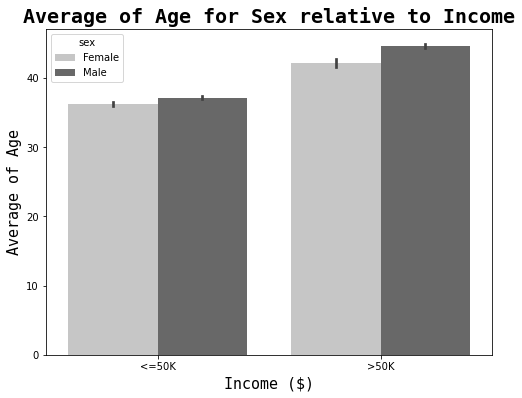

In [7]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
sb.barplot(data = data ,x = 'income',y = 'age',hue = 'sex',palette = 'Greys')
plt.title('Average of Age for Sex relative to Income', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income ($)', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Average of Age', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

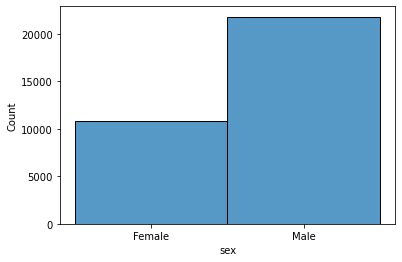

In [51]:
sb.histplot(data=data,x='sex')
plt.show()

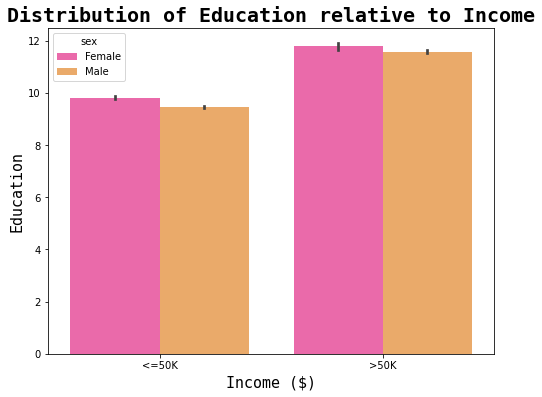

In [9]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
sb.barplot(data = data ,x = 'income',y = 'education.num',hue = 'sex',palette = 'spring')
plt.title('Distribution of Education relative to Income',
          fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income ($)', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Education', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

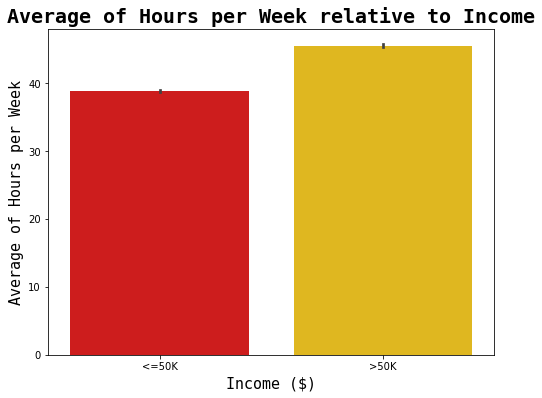

In [10]:
#Bar Chart
plt.figure(figsize=[8,6])
sb.barplot(data=data,x='income',y='hours.per.week',palette='hot')
plt.title('Average of Hours per Week relative to Income',
          fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income ($)', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Average of Hours per Week', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

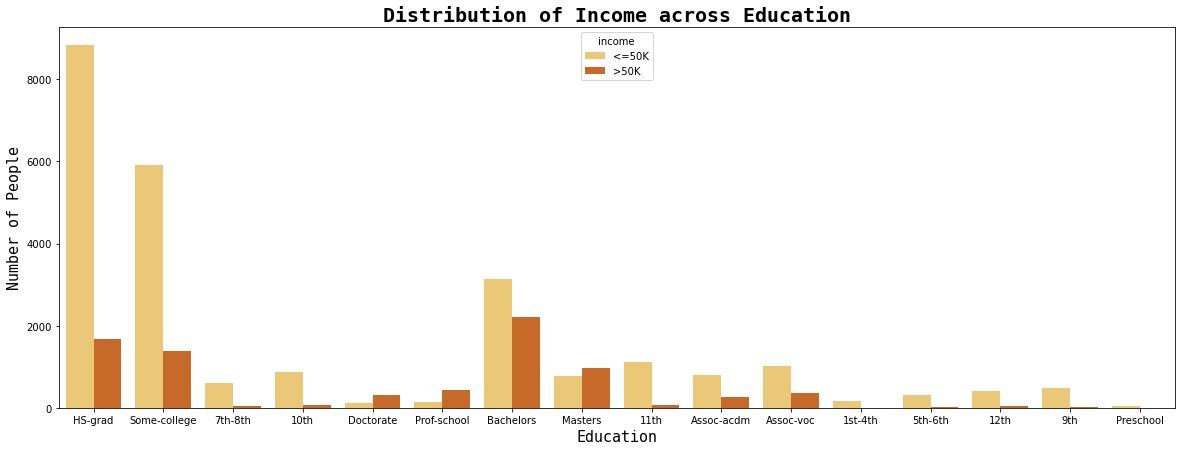

In [11]:
# Creating a countplot of income across education
plt.figure(figsize=[20,7])
sb.countplot(x=data['education'],hue=data['income'],palette='YlOrBr')
plt.title('Distribution of Income across Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of People', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

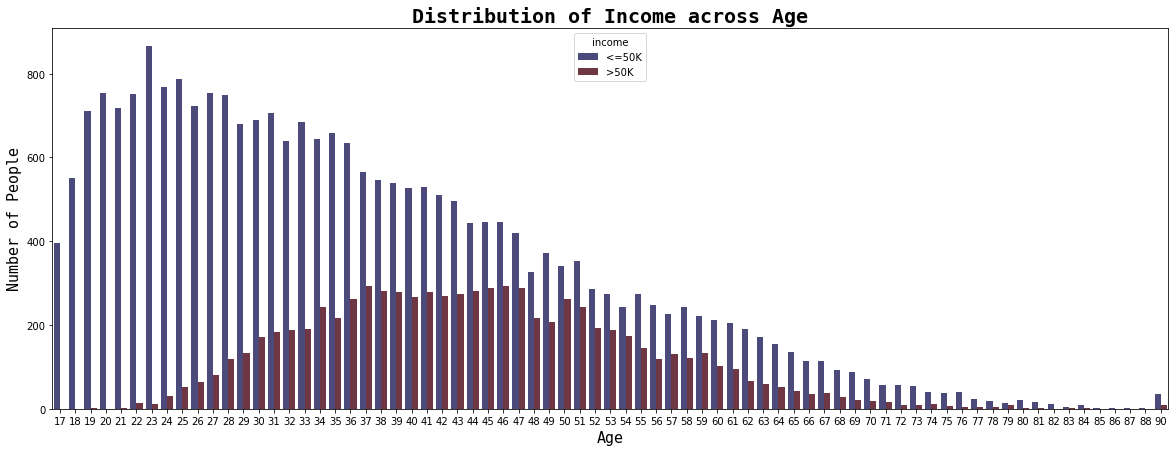

In [12]:
# Creating a countplot of income across age
plt.figure(figsize=[20,7])
sb.countplot(x=data['age'],hue=data['income'],palette='icefire')
plt.title('Distribution of Income across Age', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of People', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

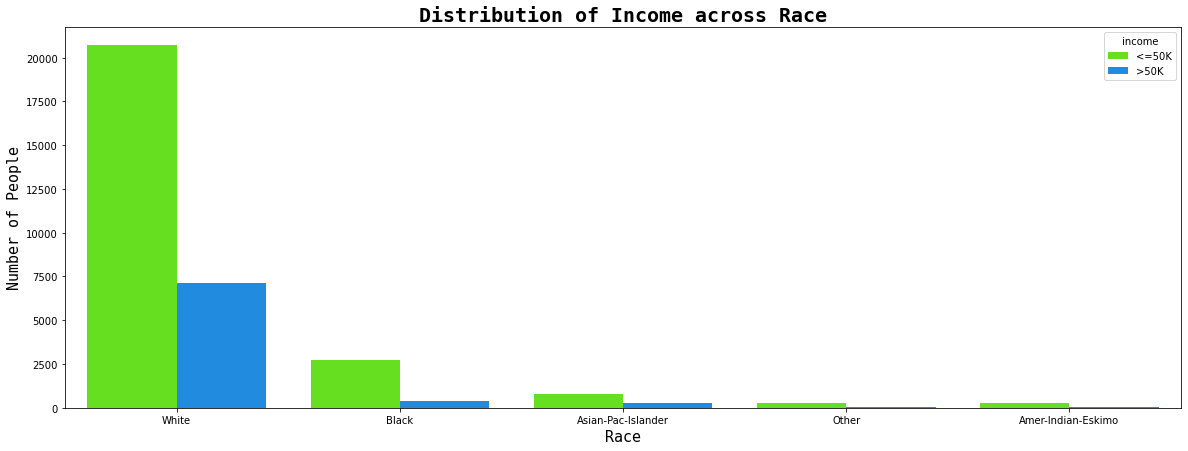

In [13]:
# Creating a countplot of income across race
plt.figure(figsize=[20,7])
sb.countplot(x=data['race'],hue=data['income'],palette='gist_rainbow')
plt.title('Distribution of Income across Race', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of People', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

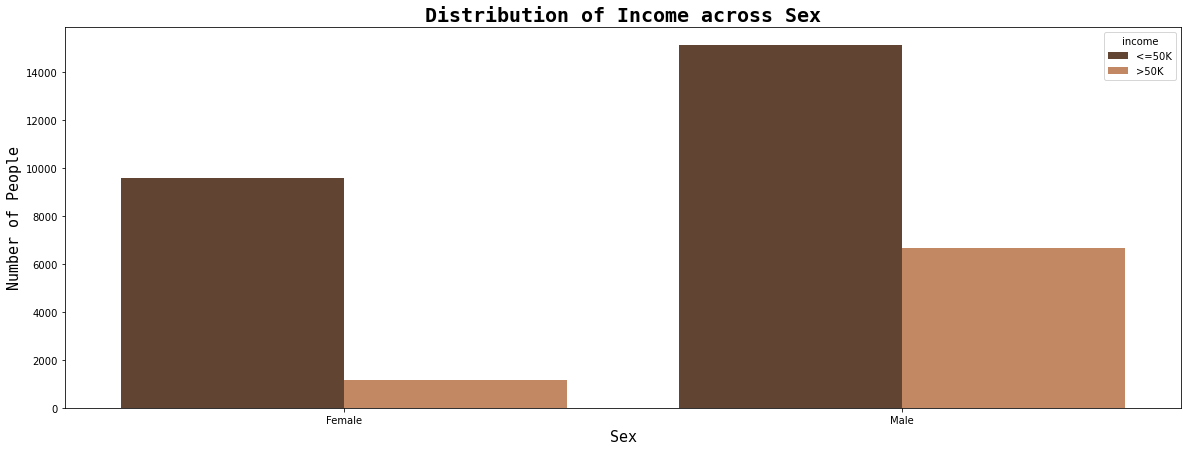

In [14]:
# Creating a countplot of income across sex
plt.figure(figsize=[20,7])
sb.countplot(x=data['sex'],hue=data['income'],palette='copper')
plt.title('Distribution of Income across Sex', fontdict={'fontname':'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Number of People', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

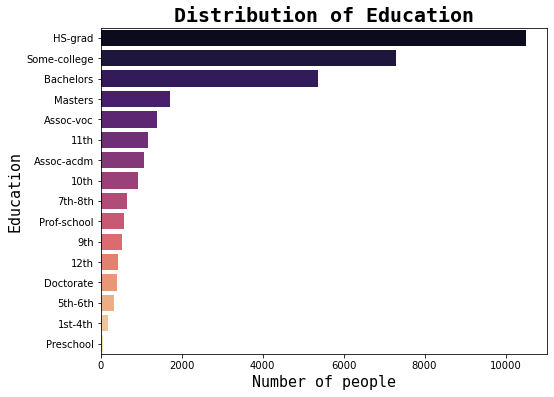

In [15]:
# Creating a barplot for 'Education'
edu = data['education'].value_counts()
plt.figure(figsize=[8,6])
sb.barplot(x=edu.values,y=edu.index,palette='magma')
plt.title('Distribution of Education', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.ylabel('Education', fontdict={'fontname':'Monospace', 'fontsize': 15,})
plt.show()

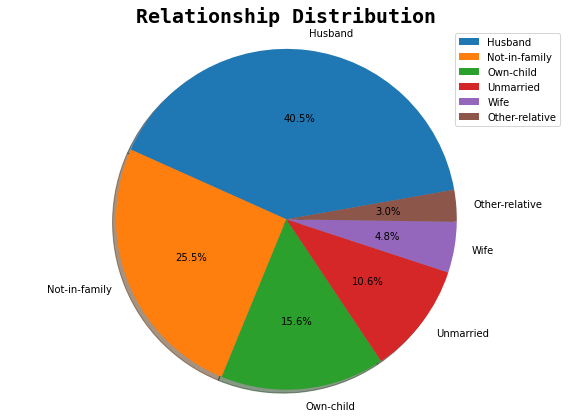

In [16]:
# Creating a pie chart for 'Relationship'
relation=data['relationship'].value_counts()
plt.figure(figsize=[10,7])
plt.pie(relation.values, labels=relation.index, startangle=10, shadow=True, autopct='%1.1f%%')
plt.title('Relationship Distribution', fontdict={'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.axis('equal')
plt.show()

# Cleaning

In [17]:
data.drop('education.num',inplace=True,axis=1)

#The matching education level of the education number:
#1: Preschool, 2: 1st-4th, 3: 5th-6th, 4: 7th-8th, 5: 9th, 6: 10th, 7: 11th, 8: 12th, 9: HS-grad,
#10: Some-college, 11: Assoc-voc, 12: Assoc-acdm, 13: Bachelors, 14: Masters, 15: Prof-school, 16: Doctorate

In [18]:
data.drop('capital.gain',inplace=True,axis=1)

In [19]:
data.drop('capital.loss',inplace=True,axis=1)

In [20]:
data.drop('fnlwgt',inplace=True,axis=1)

In [21]:
data['workclass'].replace({'?' : 'Private'}, inplace = True)

In [22]:
data['occupation'].replace({'?' : 'Prof-specialty'}, inplace = True)

In [23]:
data['native.country'].replace({'?' : 'United States'}, inplace = True)

In [24]:
data.head(100)

,age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
95,46,Private,Bachelors,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,35,Philippines,>50K
96,46,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,80,United-States,>50K
97,39,Self-emp-inc,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K
98,39,Private,Prof-school,Married-civ-spouse,Sales,Husband,White,Male,99,United-States,>50K


In [25]:
#checking for null values
data.isnull().values.any()

False

# Reducing unnecessary values within same domain

In [26]:
data['education'] = data['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'], 'School')
data['education'] = data['education'].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college', 'HS-grad'], 'College')
data['education'].value_counts()

College      20817
Bachelors     5355
School        4253
Masters       1723
Doctorate      413
Name: education, dtype: int64

In [27]:
data['marital.status'] = data['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'Married')
data['marital.status'] = data['marital.status'].replace(['Divorced', 'Separated', 'Widowed', 'Never-married', 'Married-spouse-absent'], 'Other')
data['marital.status'].value_counts()

Other      17562
Married    14999
Name: marital.status, dtype: int64

# Changing String Values to Numeric Values



In [28]:
data1 = data.copy()
data1 = data1.apply(LabelEncoder().fit_transform)
data1.head(10)

,age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,72,3,1,1,9,1,4,0,39,39,0
1,65,3,1,1,3,1,4,0,17,39,0
2,49,3,1,1,9,4,2,0,39,39,0
3,37,3,4,1,6,4,4,0,39,39,0
4,24,3,1,1,9,3,4,0,39,39,0
5,17,3,1,1,7,4,4,0,44,39,0
6,21,3,4,1,0,4,4,1,39,39,0
7,57,6,2,1,9,2,4,0,19,39,1
8,51,0,1,1,9,1,4,0,39,39,0
9,24,3,1,1,2,4,4,1,59,38,1


# Pre Processing data to be applied on any ML algo

In [29]:
income = data['income']

In [30]:
scaler = StandardScaler().fit(data1.drop('income', axis = 1))
features = scaler.transform(data1.drop('income', axis = 1))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.1)

#### Data is PROCESSED now and is READY

# Logistic Regression

In [32]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
prediction_lr = model.predict(X_test)
print("Acc on train: ", lr.score(X_train, y_train)*100)
print("Acc on test: ", lr.score(X_test, y_test)*100)
print("-------------")
print(confusion_matrix(y_test, prediction_lr))
b=lr.score(X_test, y_test)*100

Acc on train:  78.9107289107289
Acc on test:  78.66134479582438
-------------
[[2239  248]
 [ 447  323]]


# Random Forest Clasifier

In [33]:
rfc = RandomForestClassifier()
model1 = rfc.fit(X_train, y_train)
prediction_rfc = model1.predict(X_test)
print("Acc on train: ", rfc.score(X_train, y_train)*100)
print("Acc on test: ", rfc.score(X_test, y_test)*100)
print("-------------")
print(confusion_matrix(y_test, prediction_rfc))
x=rfc.score(X_test, y_test)*100

Acc on train:  95.33510783510783
Acc on test:  81.05618667485416
-------------
[[2206  281]
 [ 336  434]]


# Decision Tree Classifier
### Trained on hours per week and Native country

In [34]:
array = data1.values
X = array[:,8:10]
Y = data1['income']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
dt = DecisionTreeClassifier(criterion='entropy', ccp_alpha = 0.015)
dt.fit(X_train, Y_train) # training the model
predictions = dt.predict(X_test) 
print((accuracy_score(Y_test, predictions)))
y=accuracy_score(Y_test, predictions)*100

0.756333486872409


In [35]:
dt = DecisionTreeClassifier(criterion='gini', ccp_alpha = 0.05)
dt.fit(X_train, Y_train) # training the model
predictions = dt.predict(X_test) 
print((accuracy_score(Y_test, predictions)))
z=accuracy_score(Y_test, predictions)*100

0.756333486872409


# Naive Bayes Algorithm
### Trained on Age and Workclass

In [36]:
array = data1.values
X = array[:,:2]
Y = data1['income']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
prediction = nb.predict(X_test)
print((accuracy_score(Y_test, prediction)))
a=accuracy_score(Y_test, prediction)*100

0.7528020881314295


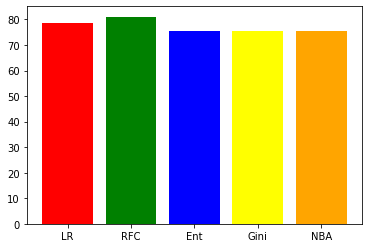

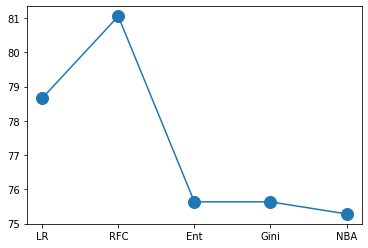

In [37]:
list=['LR','RFC','Ent','Gini','NBA']
l=[b,x,y,z,a]
#print(l)
plt.bar(list,l,color=['red','green','blue','yellow','orange'])
plt.show()
plt.plot(list,l,marker='o',markersize=12)
plt.show()

# Linear Regression
### Trained on Age, Education and Race


In [38]:
X = data1[['age','education','race']]
Y = data1['hours.per.week']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
regr = LinearRegression()
regr.fit(X, Y)
prediction = regr.predict([[50, 2, 4]])
print("Predicted Hours Of Work per week: ",prediction)

Predicted Hours Of Work per week:  [40.73384055]


# K- Means

Text(0, 0.5, 'Inertia')

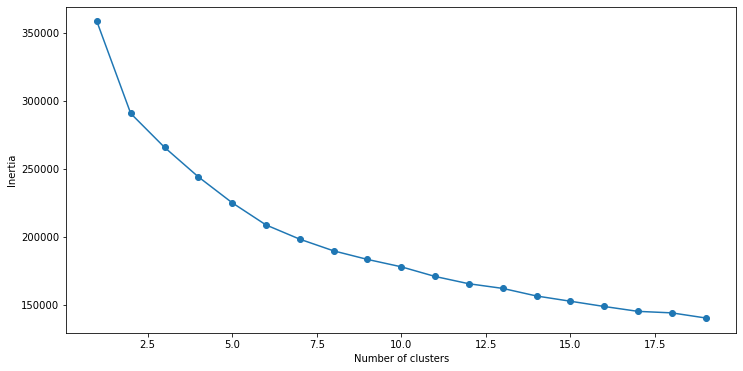

In [39]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)
pd.DataFrame(data_scaled)
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(data_scaled)
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

### After Selecting 6 Clusters

In [40]:
kmeans = KMeans(n_clusters = 6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

5    8369
1    6888
2    6381
4    6267
0    3436
3    1220
Name: cluster, dtype: int64

# Statistical Analysis

In [41]:
data.describe()

,age,hours.per.week
count,32561.000000,32561.000000
mean,38.581647,40.437456
std,13.640433,12.347429
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


## Importance of Features

In [42]:
df=data.copy()
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])


In [43]:
X = data1.drop('income', axis=1)
y = data1['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [44]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
x=zip(X.columns.tolist(), rfc.feature_importances_ * 100)
features = pd.DataFrame(x, columns=['Features', 'Importance(%)'])
features.sort_values('Importance(%)',inplace=True,ascending=False)
features

,Features,Importance(%)
0,age,29.078328
8,hours.per.week,14.882051
3,marital.status,12.532059
4,occupation,11.898038
2,education,9.640036
5,relationship,8.840291
1,workclass,6.100746
9,native.country,3.142235
6,race,2.495456
7,sex,1.390762


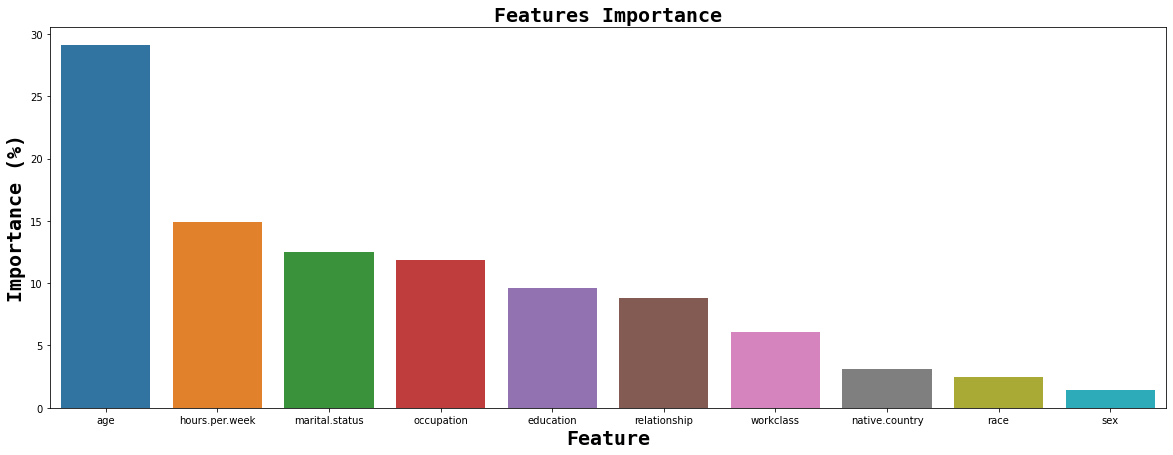

In [45]:
plt.figure(figsize=[20,7])
sb.barplot(data=features, x='Features', y='Importance(%)')
plt.title('Features Importance', fontdict={'fontname':'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Feature', fontdict={'fontname':'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.ylabel('Importance (%)', fontdict={'fontname':'Monospace', 'fontsize': 20, 'fontweight': 'bold'})

plt.show()